<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Assignment:  Machine Learning Prediction


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing\_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


***


## Import Libraries and Define Auxiliary Functions


We will import the following libraries for the lab


In [36]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.


In [37]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); 
    ax.yaxis.set_ticklabels(['did not land', 'landed'])

## Load the dataframe


Load the data


In [38]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

# ------------------------------------------------------------------------------------
# MY NOTE: I don't know why there are these two options. The two files are identical!
# ------------------------------------------------------------------------------------
# If you were unable to complete the previous lab correctly you can uncomment and load this csv
# data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')

data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [39]:
X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')

# ------------------------------------------------------------------------------------
# MY NOTE: I don't know why there are these two options. The two files are identical!
# ------------------------------------------------------------------------------------
# If you were unable to complete the previous lab correctly you can uncomment and load this csv
# X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_3.csv')

X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [40]:
Y = data['Class'].to_numpy()
# MY SANITY CHECK: so far so good! 
# print(type(Y),Y[0:10],data['Class'].head(10))

## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [41]:
# MY SANITY CHECK: verifying that all elements of `X` are of type float
# a = (list)(X.dtypes); print(a)

In [42]:
#print((list)(X.dtypes),'\n',type(X),'\n',X.tail(5))
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
#print(type(X),'\n',X[0:5])

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [43]:
# MY ADDITIONS: 

# - checking types and shapes before splitting
print(type(X),type(Y),X.shape,Y.shape)

# - do the splitting
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# - sanity check
print("X_train.shape = ",X_train.shape,"; X_test.shape = ",X_test.shape)
print("Y_train.shape = ",Y_train.shape,"   ; Y_test.shape = ",Y_test.shape)
print("test proportion check = {0:.2f}".format(X_test.shape[0] / (X_test.shape[0]+X_train.shape[0])))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> (90, 83) (90,)
X_train.shape =  (72, 83) ; X_test.shape =  (18, 83)
Y_train.shape =  (72,)    ; Y_test.shape =  (18,)
test proportion check = 0.20


we can see we only have 18 test samples.


## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


### <span style='color:red'>MY COMMENTS</span>  ###

<FONT COLOR="RED">Explanation for the tested parameters of LogisticRegression (as described <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html">here</a>):<br>
    <ul>
        <li><b>penalty:</b> string, ‘l1’ or ‘l2’. Used to specify the norm used in the penalization.</li>
        <li><b>C:</b> float, optional (default=1.0). Inverse of regularization strength; must be a positive float.    
                      Like in support vector machines, smaller values specify stronger regularization.</li>
        <li><b>solver:</b>{‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’}, default=’lbfgs’
               Algorithm to use in the optimization problem.<br><br>
             Warning The choice of the algorithm depends on the penalty chosen. Supported penalties by solver:
            <ol>
            <li>‘lbfgs’ - [‘l2’, None]
            <li>‘liblinear’ - [‘l1’, ‘l2’]
            <li>‘newton-cg’ - [‘l2’, None]
            <li>‘newton-cholesky’ - [‘l2’, None]
            <li>‘sag’ - [‘l2’, None]
            <li>‘saga’ - [‘elasticnet’, ‘l1’, ‘l2’, None]
            </ol>
        </li>
    </ul>
</FONT>

In [44]:
# Setting parameters for the grid search
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs','liblinear']}# l1 lasso l2 ridge

# Create a logistic regression object
lr=LogisticRegression()

import time
t0 = time.time() # to compute training time.

# Create a GridSearchCV object logreg_cv
logreg_cv = GridSearchCV(estimator=lr, param_grid = parameters, cv = 10)

# Fit the object to find the best parameters from the dictionary parameters
logreg_cv.fit(X_train, Y_train)

sklearn_time = time.time()-t0 # MY ADDITION: to compute training time.
print("[Scikit-Learn] Training time (s):  {0:.5f}".format(sklearn_time)) # MY ADDITION: to compute training time.

[Scikit-Learn] Training time (s):  0.23880


We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [45]:
print("tuned hyperparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy              :",logreg_cv.best_score_)
print("estimator             :",logreg_cv.best_estimator_, type(logreg_cv.best_estimator_))

tuned hyperparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy              : 0.8464285714285713
estimator             : LogisticRegression(C=0.01) <class 'sklearn.linear_model._logistic.LogisticRegression'>


In [46]:
# MY ADDITION:

# - assign the logistic regression object `lr` to the best estimator and parameters
lr = logreg_cv.best_estimator_ 
print ('Parameters for lr: ',lr.get_params()) # sanity check for `C`, `penalty`  and `solver`. Must be as above

# - check the coefficient and the intercept (output)
# print ('Coefficients: ', lr.coef_)
# print ('Intercept: ',lr.intercept_)

Parameters for lr:  {'C': 0.01, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [47]:
# sanity check using sklearn.metrics to compute the accuracy score
from sklearn.metrics import accuracy_score 
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score

predictions = lr.predict(X_test)
print('lr accuracy (sklearn.metrics):',accuracy_score(Y_test, predictions))

# ... and now prints the accuracy score as computed through the `lr` object directly
print('lr.score (lr method)         :',lr.score(X_test,Y_test))

# Scores to report in the end
LR_JaccardIndex   = jaccard_score(y_true=Y_test,y_pred=predictions)
LR_F1_Score       = f1_score(Y_test,predictions)
LR_Accuracy_Score = accuracy_score(Y_test, predictions)
print(" LR_Accuracy_Score = {0:10.6f} \n LR_JaccardIndex   = {1:10.6f} \n LR_F1_Score       = {2:10.6f}".
         format(LR_Accuracy_Score,LR_JaccardIndex,LR_F1_Score))

lr accuracy (sklearn.metrics): 0.8333333333333334
lr.score (lr method)         : 0.8333333333333334
 LR_Accuracy_Score =   0.833333 
 LR_JaccardIndex   =   0.800000 
 LR_F1_Score       =   0.888889


Lets look at the confusion matrix:


[ True  True  True  True  True  True  True  True False  True  True False
  True  True  True  True False  True]


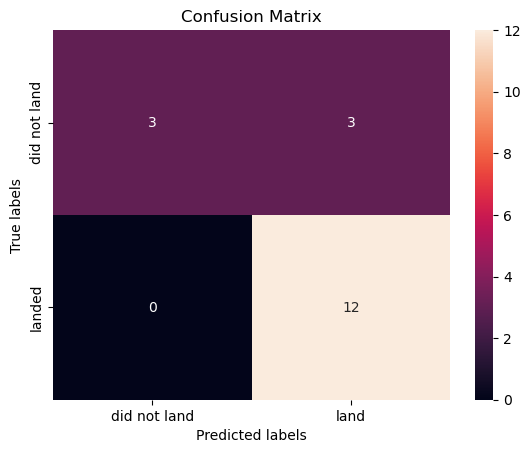

In [48]:
yhat=logreg_cv.predict(X_test)
# print(yhat == predictions) # MY ADDITION: sanity check. The vectors are equal.
plot_confusion_matrix(Y_test,yhat)
print(yhat == Y_test)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the major problem is false positives.


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv - 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [49]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),      # values tested: log(-3),log(-1.5),log(0)[?],log(1.5),log(3) (base=10)
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [50]:
t0 = time.time() # to compute training time.

# Create a GridSearchCV object svm_cv
svm_cv = GridSearchCV(estimator=svm, param_grid = parameters, cv = 10)

# Fit the object to find the best parameters from the dictionary parameters
svm_cv.fit(X_train, Y_train)

sklearn_time = time.time()-t0 # MY ADDITION: to compute training time.
print("[Scikit-Learn] Training time (s):  {0:.5f}".format(sklearn_time)) # MY ADDITION: to compute training time.

[Scikit-Learn] Training time (s):  2.56254


In [51]:
print("tuned hyperparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy              :",svm_cv.best_score_)
print("estimator             :",svm_cv.best_estimator_, type(svm_cv.best_estimator_))

tuned hyperparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy              : 0.8482142857142856
estimator             : SVC(gamma=0.03162277660168379, kernel='sigmoid') <class 'sklearn.svm._classes.SVC'>


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [52]:
# MY ADDITION:

# - assign the logistic regression object `svm` to the best estimator and parameters
svm = svm_cv.best_estimator_ 
print ('Parameters for svm: ',svm.get_params()) # sanity check for `C`, `kernel`  and `gamma`. Must be as above

# sanity check using sklearn.metrics to compute the accuracy score
predictions = svm.predict(X_test)
print('SVM accuracy (sklearn.metrics):',accuracy_score(Y_test, predictions))

# ... and now prints the accuracy score as computed through the `svm` object directly
print('svm.score (SVM method)        :',svm.score(X_test,Y_test))

# Scores to report in the end
SVM_JaccardIndex   = jaccard_score(y_true=Y_test,y_pred=predictions)
SVM_F1_Score       = f1_score(Y_test,predictions)
SVM_Accuracy_Score = accuracy_score(Y_test, predictions)
print(" SVM_Accuracy_Score = {0:10.6f} \n SVM_JaccardIndex   = {1:10.6f} \n SVM_F1_Score       = {2:10.6f}".
         format(SVM_Accuracy_Score,SVM_JaccardIndex,SVM_F1_Score))

Parameters for svm:  {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
SVM accuracy (sklearn.metrics): 0.8333333333333334
svm.score (SVM method)        : 0.8333333333333334
 SVM_Accuracy_Score =   0.833333 
 SVM_JaccardIndex   =   0.800000 
 SVM_F1_Score       =   0.888889


We can plot the confusion matrix


[ True  True  True  True  True  True  True  True False  True  True False
  True  True  True  True False  True]


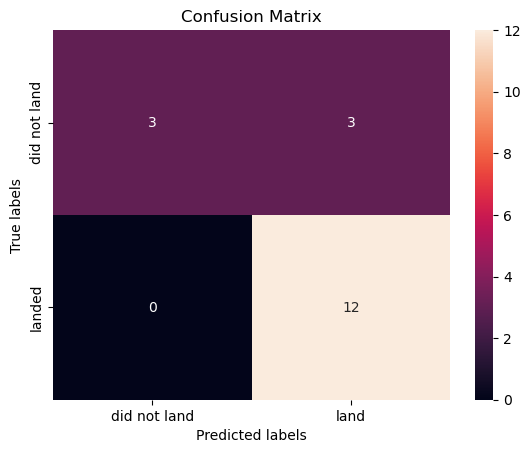

In [53]:
yhat=svm_cv.predict(X_test)
# print(yhat == predictions) # MY ADDITION: sanity check. The vectors are equal.
plot_confusion_matrix(Y_test,yhat)
print(yhat == Y_test)

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [54]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['sqrt'], # ['auto', 'sqrt'], # MY CHANGE: to avoid warning "`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`"
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [55]:
t0 = time.time() # to compute training time.

# Create a GridSearchCV object tree_cv
tree_cv = GridSearchCV(estimator=tree, param_grid = parameters, cv = 10)

# Fit the object to find the best parameters from the dictionary parameters
tree_cv.fit(X_train, Y_train)

sklearn_time = time.time()-t0 # MY ADDITION: to compute training time.
print("[Scikit-Learn] Training time (s):  {0:.5f}".format(sklearn_time)) # MY ADDITION: to compute training time.

[Scikit-Learn] Training time (s):  5.34133


In [56]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy              :",tree_cv.best_score_)
print("estimator             :",tree_cv.best_estimator_, type(tree_cv.best_estimator_))

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
accuracy              : 0.8892857142857142
estimator             : DecisionTreeClassifier(max_depth=6, max_features='sqrt', splitter='random') <class 'sklearn.tree._classes.DecisionTreeClassifier'>


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [57]:
# MY ADDITION:

# - assign the logistic regression object `tree` to the best estimator and parameters
tree = tree_cv.best_estimator_ 
# sanity check for 'criterion', 'splitter', 'max_depth', 'max_features', 'min_samples_leaf', 
# 'min_samples_split' Must be as above.
print ('Parameters for tree: ',tree.get_params()) 

# sanity check using sklearn.metrics to compute the accuracy score
predictions = tree.predict(X_test)
print('Tree accuracy (sklearn.metrics):',accuracy_score(Y_test, predictions))

# ... and now prints the accuracy score as computed through the `tree` object directly
print('tree.score (TREE method)       :',tree.score(X_test,Y_test))

# Scores to report in the end
Tree_JaccardIndex   = jaccard_score(y_true=Y_test,y_pred=predictions)
Tree_F1_Score       = f1_score(Y_test,predictions)
Tree_Accuracy_Score = accuracy_score(Y_test, predictions)
print(" Tree_Accuracy_Score = {0:10.6f} \n Tree_JaccardIndex   = {1:10.6f} \n Tree_F1_Score       = {2:10.6f}".
         format(Tree_Accuracy_Score,Tree_JaccardIndex,Tree_F1_Score))

Parameters for tree:  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'random'}
Tree accuracy (sklearn.metrics): 0.8888888888888888
tree.score (TREE method)       : 0.8888888888888888
 Tree_Accuracy_Score =   0.888889 
 Tree_JaccardIndex   =   0.846154 
 Tree_F1_Score       =   0.916667


We can plot the confusion matrix


[ True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True False]


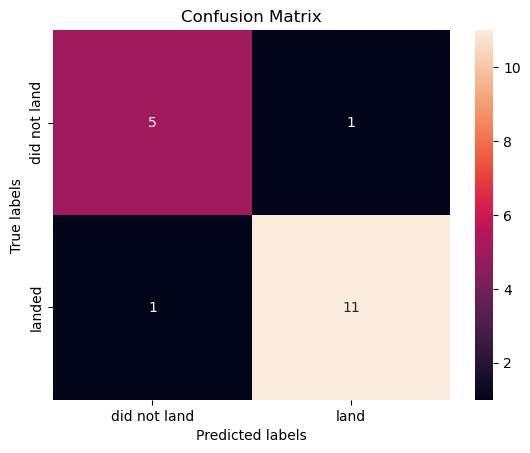

In [58]:
yhat = tree_cv.predict(X_test)
# print(yhat == predictions) # MY ADDITION: sanity check. The vectors are equal.
plot_confusion_matrix(Y_test,yhat)
print(yhat == Y_test)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [59]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [60]:
t0 = time.time() # to compute training time.

# Create a GridSearchCV object knn_cv
knn_cv = GridSearchCV(estimator=KNN, param_grid = parameters, cv = 10)

# Fit the object to find the best parameters from the dictionary parameters
knn_cv.fit(X_train, Y_train)

sklearn_time = time.time()-t0 # MY ADDITION: to compute training time.
print("[Scikit-Learn] Training time (s):  {0:.5f}".format(sklearn_time)) # MY ADDITION: to compute training time.

[Scikit-Learn] Training time (s):  2.52463


In [61]:
print("tuned hyperparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy              :",knn_cv.best_score_)
print("estimator             :",knn_cv.best_estimator_, type(knn_cv.best_estimator_))

tuned hyperparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy              : 0.8482142857142858
estimator             : KNeighborsClassifier(n_neighbors=10, p=1) <class 'sklearn.neighbors._classification.KNeighborsClassifier'>


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [62]:
# MY ADDITION:

# - assign the knn object `KNN` to the best estimator and parameters
KNN = knn_cv.best_estimator_ 
print ('Parameters for knn: ',KNN.get_params()) # sanity check for 'n_neighbors', 'algorithm', 'p'. Must be as above

# sanity check using sklearn.metrics to compute the accuracy score
predictions = KNN.predict(X_test)
print('KNN accuracy (sklearn.metrics):',accuracy_score(Y_test, predictions))

# ... and now prints the accuracy score as computed through the `KNN` object directly
print('KNN.score (KNN method)        :',KNN.score(X_test,Y_test))

# Scores to report in the end
KNN_JaccardIndex   = jaccard_score(y_true=Y_test,y_pred=predictions)
KNN_F1_Score       = f1_score(Y_test,predictions)
KNN_Accuracy_Score = accuracy_score(Y_test, predictions)
print(" KNN_Accuracy_Score = {0:10.6f} \n KNN_JaccardIndex   = {1:10.6f} \n KNN_F1_Score       = {2:10.6f}".
         format(KNN_Accuracy_Score,KNN_JaccardIndex,KNN_F1_Score))

Parameters for knn:  {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}
KNN accuracy (sklearn.metrics): 0.8333333333333334
KNN.score (KNN method)        : 0.8333333333333334
 KNN_Accuracy_Score =   0.833333 
 KNN_JaccardIndex   =   0.800000 
 KNN_F1_Score       =   0.888889


We can plot the confusion matrix


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True False  True  True False
  True  True  True  True False  True]


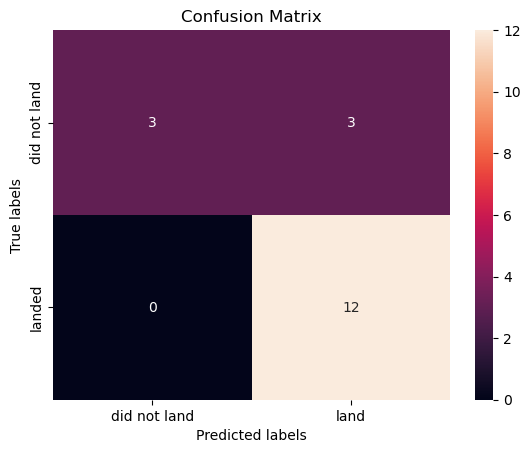

In [63]:
yhat = knn_cv.predict(X_test)
print(yhat == predictions) # MY ADDITION: sanity check. The vectors are equal.
plot_confusion_matrix(Y_test,yhat)
print(yhat == Y_test)

## TASK  12


Find the method performs best:


In [64]:
# generate lists to build the Report dataframe 
models_lst = [ 'KNN', 'Tree', 'LR', 'SVM' ]
jaccard_lst  = [ KNN_JaccardIndex, Tree_JaccardIndex, LR_JaccardIndex, SVM_JaccardIndex]
f1_lst       = [ KNN_F1_Score, Tree_F1_Score, LR_F1_Score, SVM_F1_Score ]
accuracy_lst = [ KNN_Accuracy_Score, Tree_Accuracy_Score, LR_Accuracy_Score, SVM_Accuracy_Score ]

# create the Report dataframe 
Report = pd.DataFrame(list(zip(models_lst,jaccard_lst,f1_lst,accuracy_lst)),
                      columns =['model', 'jaccard index','f1_score','accuracy'])
Report.set_index('model', inplace=True, drop=True) # remove row indices, reindexing them with column 'models'

# library to print dataframe in tabular format
# Tip from: https://www.geeksforgeeks.org/display-the-pandas-dataframe-in-table-style/
from tabulate import tabulate
# displaying the metrics DataFrame in tabular format
# More tips about tabulate: https://pypi.org/project/tabulate/

# print Report dataframe in tabular format (numerical cells are right aligned and printed with 6 decimals )
print(tabulate(Report, headers = 'keys', tablefmt = 'fancy_grid', floatfmt=".6f", numalign="right"))

╒═════════╤═════════════════╤════════════╤════════════╕
│ model   │   jaccard index │   f1_score │   accuracy │
╞═════════╪═════════════════╪════════════╪════════════╡
│ KNN     │        0.800000 │   0.888889 │   0.833333 │
├─────────┼─────────────────┼────────────┼────────────┤
│ Tree    │        0.846154 │   0.916667 │   0.888889 │
├─────────┼─────────────────┼────────────┼────────────┤
│ LR      │        0.800000 │   0.888889 │   0.833333 │
├─────────┼─────────────────┼────────────┼────────────┤
│ SVM     │        0.800000 │   0.888889 │   0.833333 │
╘═════════╧═════════════════╧════════════╧════════════╛


<font color="red">
    <b>My ANSWER:</b> 
    <p align="justify">
    All models perform equally. As seen in the table above, Jaccard, F1 Score and Accuracy indices have exactly the same value. The only major difference observed was that the training time for Logistic Regression was much smaller than for the other models (e.g., 18+ times faster than that for the Tree model). 
</font>

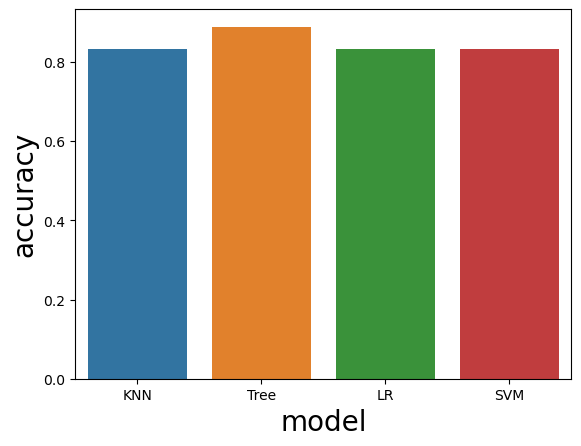

In [66]:
# generate the barplot in descending order
sns.barplot(x=(list)(Report.index), y="accuracy", data=Report)
plt.xlabel("model",fontsize=20)
plt.ylabel("accuracy",fontsize=20)
plt.show()

## Authors


<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By    | Change Description      |
| ----------------- | ------- | ------------- | ----------------------- |
| 2021-08-31        | 1.1     | Lakshmi Holla | Modified markdown       |
| 2020-09-20        | 1.0     | Joseph        | Modified Multiple Areas |


Copyright © 2020 IBM Corporation. All rights reserved.
